# Exercise 02.1
## Mean Estimation Method and Importance Sampling
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
In this exercise we compute numerically an integral with the mean estimation method. Such method consists in estimating the value of an integral $$ I = \int_{a}^{b} f(x)dx$$ with the quantity $$(b-a)\langle g \rangle = (b-a)\frac{1}{N}\sum_{i=1}^{N} g(x_i) $$ where the $x_i$ are drawn from a distribution $p(x)$; $g(x)=\frac{f(x)}{p(x)}$ and $N$ is the number of variables extracted. Convergence of the estimator is granted by the Central Limit Theorem. At $N$ fixed, the more $|f|-p$ is close to 0, the smaller the error associated with the estimation. In principle, if $f\geq 0$, then $f=\lambda p$ would be the optimal choice, but in order to compute the normalization $\lambda$ one would need to know the integral first, which is exactly what one wants to compute.  

## Estimation of the integral
The integral we have to compute is: $$ I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

We perform the computation twice, sampling the $x$ variable from two different $p(x)$:
1. The first estimation (graph in blue) is done drawing $x$ from a uniform distribution in the interval $[0, 1)$: $$ p(x)=\chi_{[0,1)} $$
2. The second one (graph in orange) is done with importance sampling. $x$ is drawn from a linear distribution in the interval $[0, 1)$ of the form: $$ p(x) = 2(1-x)\chi_{[0,1)} $$ Such a functional dependence is chosen because it's the highest-order analytically invertible polynomial distribution (higher order polynomials need to be sampled with accept-reject methods, which could make the execution slower). The coefficients of the linear function are chosen for normalization and such that $p(1)=0$.  If $p(x<1)=0$, then $g(x)$ would be singular, and if $p(x>1)=0$, the sampling would be less efficient.

The integrand reaches its maximum in $x=0$, so we expect the second distribution chosen, which is greater close to 0, to give results with a smaller variance than the ones obtained by sampling uniformly the $[0,1)$ interval.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

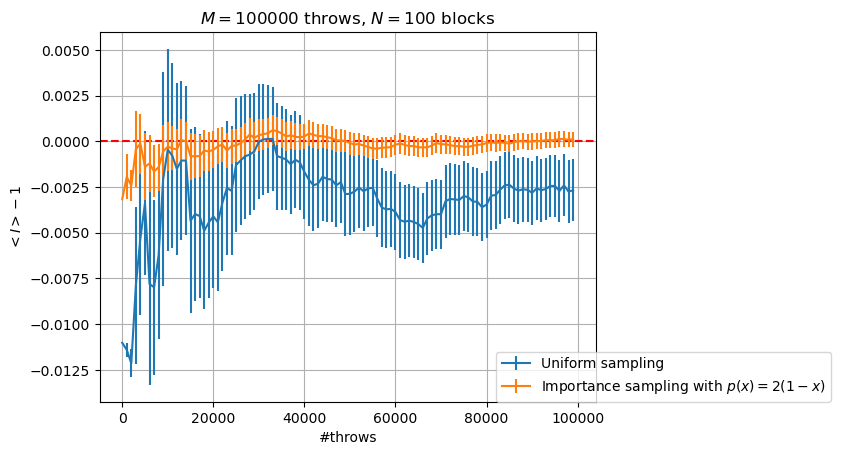

In [3]:
# Load parameters from file
M, N = np.loadtxt("es02.1/parameters.dat", delimiter=' ', usecols=(0, 1))
L = int(M/N)  # Calculate the length of each block

# Creation of figure
fig, ax = plt.subplots(1, 1)

# Define x values based on the number of throws and blocks
x = np.arange(N)
x *= L  # Number of throws = block * (Number of throws in each block)

# Load data from file for uniform sampling and importance sampling
av_unif, err_unif = np.loadtxt("es02.1/integ_unif.out", usecols=(0, 1), delimiter=' ', unpack='true')
av_import, err_import = np.loadtxt("es02.1/integ_importance.out", usecols=(0, 1), delimiter=' ', unpack='true')

# Set axes parameters
ax.set_xlabel('#throws')
ax.set_ylabel(f'$<I>-1$')
ax.set_title(f'$M={int(M)}$ throws, $N={int(N)}$ blocks')
ax.grid(True)

# Plot horizontal line at y=0 for reference
ax.axhline(y=0, color='red', linestyle='--')

# Plot error bars for uniform sampling and importance sampling
ax.errorbar(x, av_unif - 1, yerr=err_unif, label='Uniform sampling')
ax.errorbar(x, av_import - 1, yerr=err_import, label=f'Importance sampling with $p(x)=2(1-x)$')

# Add legend to the plot
ax.legend(loc=(0.8, 0.))

As expected, the evaluation performed with importance sampling converges faster to the true value and has a smaller error than the uniform sampling.

# Exercise 02.2
Now we study how the square root of the average distance squared $\sqrt{|r_n|^2}$ of a $3D$ random walk evolves as a function of the length (a.k.a number of steps $n$) of the walk itself, first with a random walk on cubic lattice and then with a spherically symmetric one. 
## Random walks in d dimensions
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
A random walk is a stochastic process that consists in the evolution over time of a position vector (called walker). Without loss of generality, we take the initial position in the origin.
At every discrete time step, the walker takes a step $x$ in a random direction with magnitude $a$ (In our case $a=1$). Every step is independent from the previous ones, so the process is markovian. For lattice walks, the step can be taken forward or backwards in any of the $d$ dimensions of the lattice, while for continuum walks the walker could land at any point on a sphere of radius $a$ centered in its current position. In general, the probability distribution of directions (or solid angle) could be non-uniform, but we will only study the uniform case.
Since the position vector after $n$ steps is the sum of iid random variables, by the Central Limit Theorem we expect that: $$ \langle  r_n \rangle = n\langle x \rangle$$ and $$ \langle  |r_n|^2 \rangle = n\sigma_x^2$$ For $x$ uniformly distributed between all directions/solid angles, it is pretty straightforward that $\langle x \rangle = 0$ and $\sigma_x^2=a^2$. In conclusion, we expect: $$ \langle  \sqrt{|r_n|^2} \rangle = a\sqrt{n} $$
Notice that this result is independent of the kind of random walk we're considering: both lattice and continuum random walks obey the same law. This fact is called <font color="red">  Universality. </font> 

## Sampling uniformly the solid angle
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
The infinitesimal solid angle is $$ d\Omega= sin\theta d\theta d\phi $$ This means that, in order to sample uniformly $d\Omega$, $\phi$ must be sampled uniformly in $[0, 2\pi)$ too, but $\theta$ must follow the distribution $p(\theta)=\frac{1}{2}sin\theta$ in the interval $[0, \pi)$. This is achieved easily with the cumulative inversion method.

For every different length $n$ of the random walk, $M=10^5$ walks are generated, used to calculate $N=10^2$ different values of $\sqrt{|r_n|^2}$. The results shown on the graph are the averages and statistical uncertainties of such $N$ evaluations of the variable of interest. The uncertainties have been magnified by 20 times to make them clearly visible. Finally, we fit the simulated data with a functional form $f(n)=a\sqrt{n}$ and compute the $\chi^2=\sum_{i=1}^n \frac{(O_i-E_i)^2}{\sigma_i^2}$ variable by comparing data and the fitted function.  
__Note:__ The variable associated with $n=1$ has 0 uncertainty, since after only one step the distance from the origin can only be 1. Thus that piece of data is not used in the calculation of $\chi^2$. One other degree of freedom is lost since the function the data is compared with is obtained as a fit with one parameter of the data itself. In the end, the associated degrees of freedom are 98.

In [2]:
from scipy.optimize import curve_fit

# Define fitting function for square root curve
def square_root(x, a):
    # Compute the square root of the input x
    y = np.sqrt(x)
    
    # Multiply the square root by the fitting parameter a
    return a * y


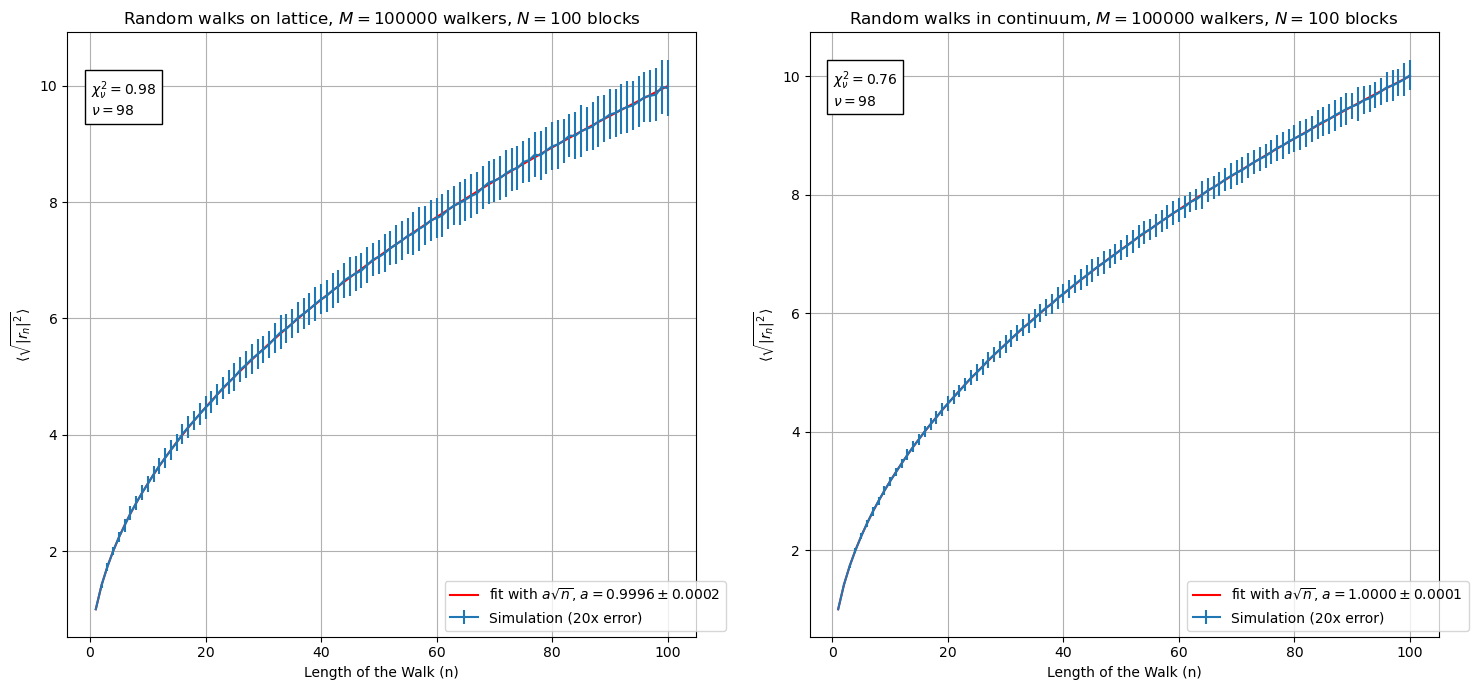

In [8]:
# Load parameters from file
M, N = np.loadtxt("es02.2/parameters.dat", delimiter=' ', usecols=(0, 1))
L = int(M/N)  # Calculate the length of each block

# Creation of figure with subplots
fig, axx = plt.subplots(1, 2, figsize=(15, 7), tight_layout=True)
axx.reshape(-1)

# Load data from file
x, av_unif, err_unif = np.loadtxt("es02.2/distances.out", usecols=(0, 1, 2), delimiter=' ', unpack='true')
av_import, err_import = np.loadtxt("es02.2/distances_sphere.out", usecols=(1, 2), delimiter=' ', unpack='true')
data = [[av_unif, err_unif], [av_import, err_import]]

# Titles for the subplots
title = ["on lattice", "in continuum"]

# Iterate over the subplots
for i in range(2):
    # Set axes parameters
    axx[i].set_xlabel('Length of the Walk (n)')
    axx[i].set_ylabel(r'$\langle \sqrt{|r_n|^2} \rangle$')
    axx[i].set_title(f'Random walks {title[i]}, $M={int(M)}$ walkers, $N={int(N)}$ blocks')
    axx[i].grid(True)
    
    # Perform fit with curve_fit
    p_opt, p_cov = curve_fit(square_root, x, data[i][0])
    square_fit = square_root(x, p_opt[0])
    
    # Plot the fitted curve
    axx[i].plot(x, square_root(x, p_opt[0]), color="Red", label="fit with $a\sqrt{n}$," + f" $a={format(p_opt[0], '.4f')}\pm {format(np.sqrt(p_cov[0][0]), '.4f')}$")
    
    # Plot the data with error bars (20x error)
    axx[i].errorbar(x, data[i][0], yerr=20*data[i][1], label="Simulation (20x error)")
    
    # Compute chi-square with the fitting function
    observed = data[i][0][1:]
    variances = data[i][1][1:]
    squared_distances = (observed - square_root(x[1:], p_opt[0]))**2 / (variances**2)
    chi2 = np.sum(squared_distances) / (squared_distances.shape[0]-1)
    
    # Add text box for displaying chi-square and degrees of freedom
    axx[i].text(0.1, 9.5, 
        r"$\chi_{\nu}^2$"+f"$={format(chi2, '.2f')}$ \n"+r"$\nu=98$ ", 
        bbox=dict(facecolor='white', alpha=1))
    
    # Add legend to the subplot
    axx[i].legend(loc=(0.6, 0.01))

As expected, both the random walks follow the same scaling law. The values of reduced $\chi^2$ lower than $1$ mean that there is very good accordance between the simulated data and the predicted functional dependence. In particular $P(\chi_{\nu}^2 \geq 0.98)$ and $P(\chi_{\nu}^2 \geq 0.76)$ are both far above the usual $0.05$ threshold.